# Assignment 2
## Linear Regression
Analysing housing data in Sacramento, CA, and predicting house prices.

### 1) Importing required libraries

In [88]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

### 2) Import and analyse the housing data

#### Performing EDA (Exploratory Data Analysis) and having fun!

In [33]:
# Read CSV
data = pd.read_csv("data.csv")
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


Getting the dimensions of the array.

In [34]:
# print the shape of the array
print(data.shape)
## write your code and run the cell

(985, 12)


In [35]:
# DO NOT CHANGE, JUST RUN THE CELL
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


Making sure if we imported the right dataset by looking at the first five entries.

In [36]:
# Head
data.head()
## print the data head

## write your code and run the cell

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


Making sure if we imported the right dataset by looking at the last five entries.

In [37]:
# Tail
data.tail()
## print the data tail

## write your code and run the cell

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


Making sure that there are no null values.

In [38]:
# DO NOT CHANGE, JUST RUN THE CELL
# Check Null Values
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

Measures of change and central tendency.

In [39]:
# DO NOT CHANGE, JUST RUN THE CELL
data.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


Perfect! everything looks good.

### 3) Predict Price

Our goal is to predict the price given new information about a house in the area covered by the data.

#### List all possible variables which might be a Predictor variable.

In [40]:
# ANSWER
#zip code, sq__ft, beds
## COMMENT YOUR ANSWER HERE (CHOOSE ATLEAST 3 DIFFERENT PREDICTOR VARIABLES)

#### Setting the target variable

In [41]:
# DO NOT CHANGE, JUST RUN THE CELL
def draw_scatter_plot(X, Y):
    fig = plt.figure(figsize=(15,7))
    ax = plt.gca()
    ax.scatter(X, Y, c='b')
    plt.show();

In [42]:
# Target Variable - SET THE TARGET VARIABLE TO PRICE VALUES FROM 'data'
Y = data['price']

In [43]:
# Predictor Variable - SET THE PREDICTOR VARIBLE TO ONE OF YOUR CHOICES OF PREDICTOR VARIABLES
X = data['sq__ft']

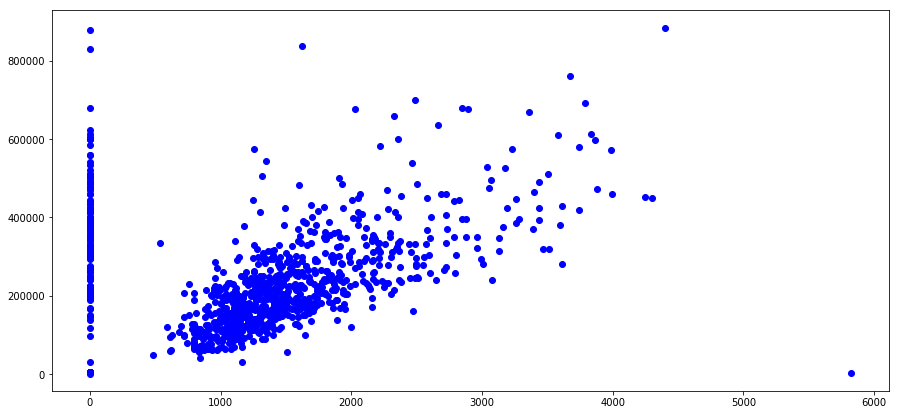

In [44]:
# DO NOT CHANGE, JUST RUN THE CELL
draw_scatter_plot(X, Y)

In [45]:
# Predictor Variable - SET A SECOND PREDICTOR VARIABLE
X = data['zip']

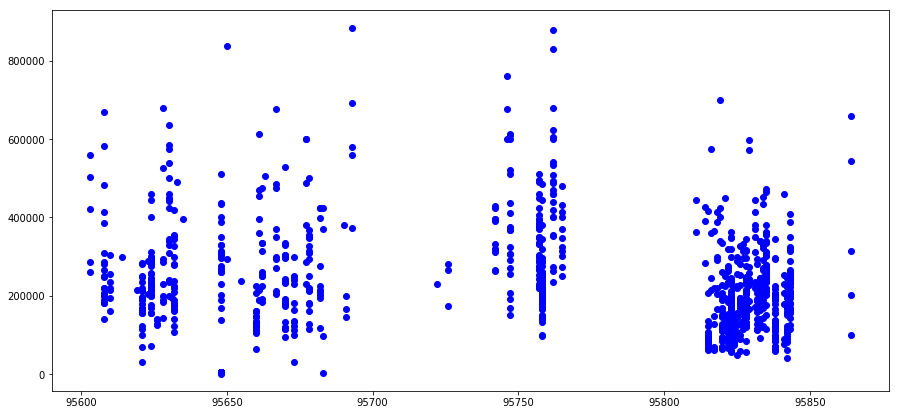

In [46]:
# DO NOT CHANGE, JUST RUN THE CELL
draw_scatter_plot(X, Y)

In [47]:
# Predictor Variable - SET A THIRD PREDICTOR VARIABLE
X = data['beds']

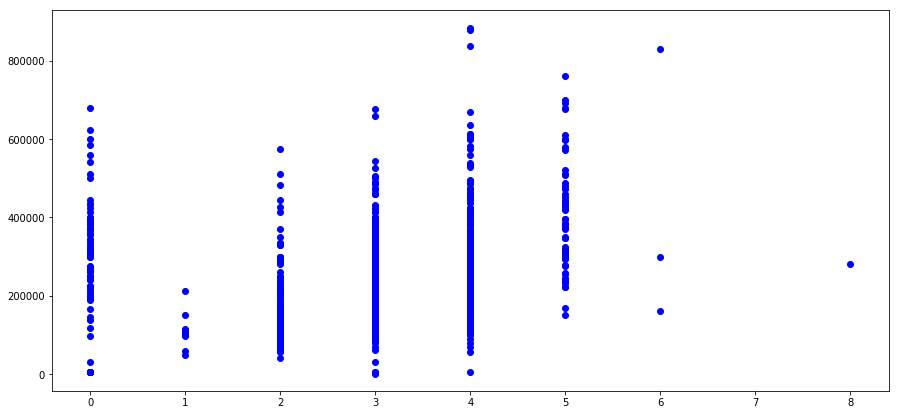

In [48]:
# DO NOT CHANGE, JUST RUN THE CELL
draw_scatter_plot(X, Y)

In [49]:
# Out of the three what do you think is the best predictor of price?

## sq_feet because is is scattered around many different values, 
## or in other words has a significant correlation with price

#### Finding the best linear fit for the data to predict price.

In [50]:
# Why does calculating mean won't work?

## Enter your reasoning, why mean or anyother singular measure of central tendency won't work here.
## Calculating the mean won't work because the data has many outliers, especilally for sq__Ft where there is 0 sq__ft 
## but the pries are still very hihg.

###### Let's analyse the Mean further.
Considering the easiest prediction of price: Mean.

We have a number of houses, the easiest value to estimate the value of a new house in the area will be the mean.

In [51]:
# Mean of price - FILL IN THE MISSING VALUE IN THE CODE TO CALCULATE THE MEAN OF PRICE
data['meanValues'] = data['price'].mean()

In [52]:
# DO NOT CHANGE, JUST RUN THE CELL
X = data['sq__ft'] # lets consider the sq__ft values for a moment
Y = data['price']
meanValues = data['meanValues']

In [53]:
# DO NOT CHANGE, JUST RUN THE CELL
def draw_plot(X, Y, Yhat):
    fig = plt.figure(figsize=(15,7))
    ax = plt.gca()
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');
    plt.show();

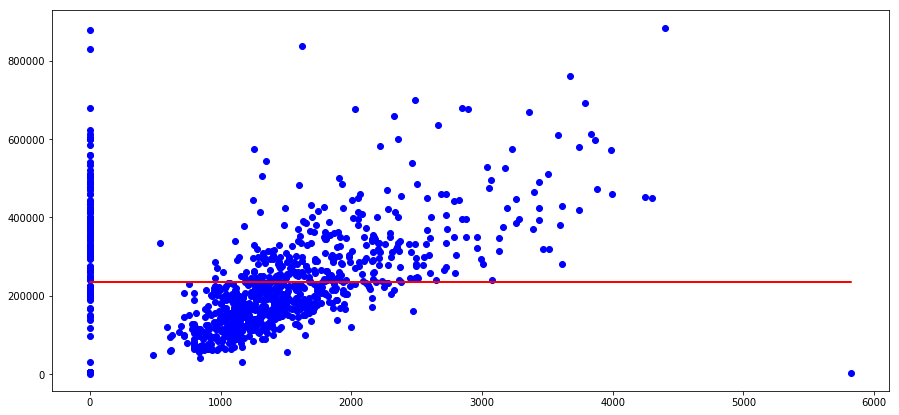

In [54]:
# DO NOT CHANGE, JUST RUN THE CELL
draw_plot(X, Y, meanValues)

In [55]:
# WHAT DO YOU THINK IS WRONG WITH THE GRAPH ABOVE?

## Type your analysis here.
## There are many outliers shown for when there is 0 sq ft yet the prices are high up, this also creates the fault
## that the graph has a horizontal line of best-fit

#### Calculating the residuals.

Residual is basically the difference between the actual value and the predicted value. Therefore, the lesser the residual, the better the prediction.

In [56]:
# ANSWER - Calculating the mean of the residual values - COMPLETE THE CODE TO CALCULATE THE RESIDUAL 
# BETWEEN THE PRICES AND MEAN
residual = abs(data['price'] - data['meanValues']).mean()
residual

103452.16956891476

But this is bad, why?

Because, only by looking at the data we can say that the price increases as the sq__ft values increase. But, the mean 
value suggests that hte price remains the same with any value of the sq__ft. Plus, the average residual value is too high.

What is a better way?

#### Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

#### Defining X and Y.

>>>>>X1

In [57]:
# Predictor Variable - SET THE PREDICTOR VARIBLE (X1) TO ONE OF YOUR CHOICES OF PREDICTOR VARIABLES
X1 = data['sq__ft']
Y = data['price']

#### Calculating beta1.

In [58]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    beta_1 = n/d
    return beta_1

In [59]:
# Complete the code to calculate the beta1 for X1
beta1 = calculatebeta1(X1, Y)
beta1

54.158639688530755

#### Calculating beta0.

In [60]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta0(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    beta0 = Ybar - calculatebeta1(X, Y) * Xbar
    return beta0

In [61]:
# Complete the code to calculate the beta0 for X1
beta0 = calculatebeta0(X1, Y)
beta0

162930.16140699777

#### Find the predicted values predictedValues.

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [62]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatePredictions(x, b0, b1):
    return b0 + b1 * x

In [63]:
# Complete the code to calculate the predictions of values in X1
predictedValues1 = calculatePredictions(X1, beta0, beta1)
predictedValues1

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
5      223696.155138
6      222721.299623
7      226674.880320
8      213893.441354
9      224995.962490
10     212160.364884
11     232740.647966
12     210102.336576
13     218171.973889
14     218280.291169
15     224346.058814
16     208640.053304
17     205986.279959
18     194775.441544
19     236369.276825
20     223479.520579
21     234906.993553
22     230086.874621
23     249638.143548
24     211727.095766
25     221854.761388
26     215084.931427
27     223533.679218
28     237669.084177
29     230520.143738
           ...      
955    237181.656420
956    233877.979399
957    231278.364694
958    257166.194465
959    245088.817814
960    241460.188955
961    239618.795206
962    211023.033450
963    264856.721301
964    233444.710281
965    239727.112485
966    162930.161407
967    234365.407156
968    258790.953656
969    251046.268180
970    162930.161407
971    219255

#### Calculating the residuals.

In [64]:
# Complete the code to calculate the residual for X1
residual = abs(data['sq__ft'] - data['meanValues']).mean()
residual

232829.34720811728

#### Plot of predicted values

The red line in the plot below shows the regression line calculated by the linear regression algorithm above.

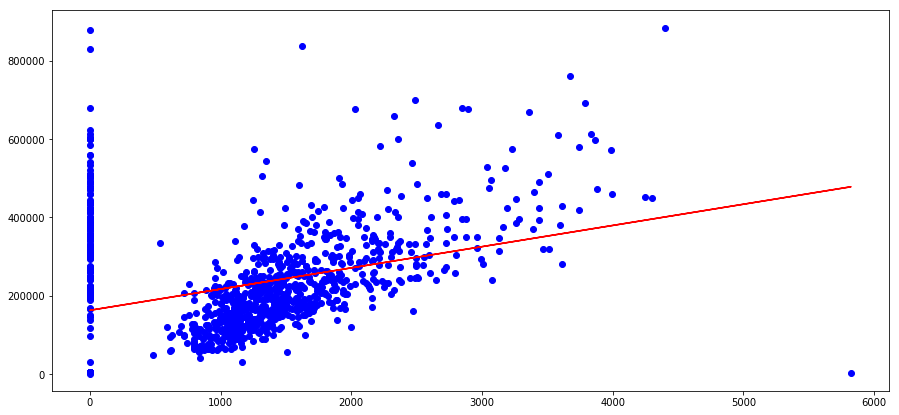

In [65]:
# DO NOT CHANGE, JUST RUN THE CELL
draw_plot(X1, Y, predictedValues1)

>>>>>X2

In [66]:
# Predictor Variable - SET THE PREDICTOR VARIBLE (X2) TO ANOTHER OF YOUR CHOICES OF PREDICTOR VARIABLES
X2 = data['beds']
Y = data['price']

#### Calculating beta1.

In [67]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    beta_1 = n/d
    return beta_1

In [68]:
# Complete the code to calculate the beta1 for X2
beta1 = calculatebeta1(X2, Y)
beta1

36182.6439689373

#### Calculating beta0.

In [69]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta0(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    beta0 = Ybar - calculatebeta1(X, Y) * Xbar
    return beta0

In [70]:
# Complete the code to calculate the beta0 for X2
beta0 = calculatebeta0(X2, Y)
beta0

128792.15948942926

#### Find the predicted values predictedValues.

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [71]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatePredictions(x, b0, b1):
    return b0 + b1 * x

In [72]:
# Complete the code to calculate the predictions of values in X2
predictedValues2 = calculatePredictions(X2, beta0, beta1)
predictedValues2

0      201157.447427
1      237340.091396
2      201157.447427
3      201157.447427
4      201157.447427
5      237340.091396
6      237340.091396
7      237340.091396
8      201157.447427
9      237340.091396
10     237340.091396
11     237340.091396
12     164974.803458
13     237340.091396
14     201157.447427
15     201157.447427
16     201157.447427
17     201157.447427
18     201157.447427
19     237340.091396
20     237340.091396
21     273522.735365
22     273522.735365
23     237340.091396
24     237340.091396
25     237340.091396
26     237340.091396
27     237340.091396
28     273522.735365
29     237340.091396
           ...      
955    237340.091396
956    237340.091396
957    237340.091396
958    273522.735365
959    237340.091396
960    237340.091396
961    237340.091396
962    237340.091396
963    237340.091396
964    237340.091396
965    237340.091396
966    237340.091396
967    273522.735365
968    273522.735365
969    273522.735365
970    128792.159489
971    237340

#### Calculating the residuals.

In [73]:
# Complete the code to calculate the residual for X2
residual = abs(data['beds'] - data['meanValues']).mean()
residual

234141.35228425937

#### Plot of predicted values

The red line in the plot below shows the regression line calculated by the linear regression algorithm above.

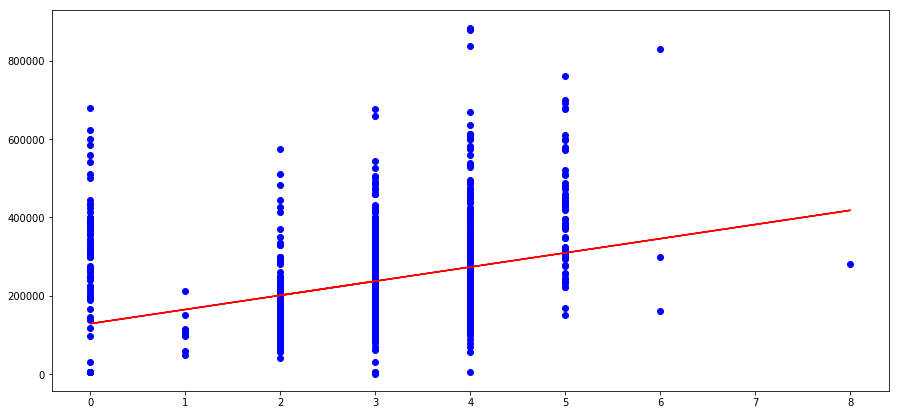

In [74]:
# DO NOT CHANGE, JUST RUN THE CELL
draw_plot(X2, Y, predictedValues2)

>>>>>X3

In [75]:
# Predictor Variable - SET THE PREDICTOR VARIBLE (X3) TO ANOTHER OF YOUR CHOICES OF PREDICTOR VARIABLES
X3 = data['zip']
Y = data['price']

#### Calculating beta1.

In [76]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar))
    beta_1 = n/d
    return beta_1

In [77]:
# Complete the code to calculate the beta1 for X3
beta1 = calculatebeta1(X3, Y)
beta1

-151.64857645111266

#### Calculating beta0.

In [78]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta0(X, Y):
    
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta0 = Ybar - calculatebeta1(X, Y) * Xbar
    
    return beta0

In [79]:
# Complete the code to calculate the beta0 for X3
beta0 = calculatebeta0(X3, Y)
beta0

14754601.22826208

#### Find the predicted values predictedValues.

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [ ]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatePredictions(x, b0, b1):
    return b0 + b1 * x

In [81]:
# Complete the code to calculate the predictions of values in X3
predictedValues3 = calculatePredictions(X3, beta0, beta1)
predictedValues3

0      220904.958340
1      223179.686987
2      224392.875599
3      224392.875599
4      223028.038411
5      220450.012611
6      220298.364035
7      223634.632716
8      246381.919184
9      245926.973455
10     220904.958340
11     223179.686987
12     224392.875599
13     223331.335564
14     220298.364035
15     220298.364035
16     245926.973455
17     253812.699430
18     221663.201223
19     245926.973455
20     253812.699430
21     223179.686987
22     247898.404949
23     221511.552646
24     247898.404949
25     220146.715458
26     223634.632716
27     221814.849799
28     222573.092681
29     222421.444105
           ...      
955    234704.978797
956    247898.404949
957    252144.565089
958    253357.753701
959    220146.715458
960    222421.444105
961    253357.753701
962    222421.444105
963    255480.833771
964    233188.493033
965    233036.844456
966    245168.730573
967    255784.130924
968    252144.565089
969    220298.364035
970    221511.552646
971    223482

#### Calculating the residuals.

In [83]:
# Complete the code to calculate the residual for X3
residual = abs(data['zip'] - data['meanValues']).mean()
residual

138393.56649746303

#### Plot of predicted values

The red line in the plot below shows the regression line calculated by the linear regression algorithm above.

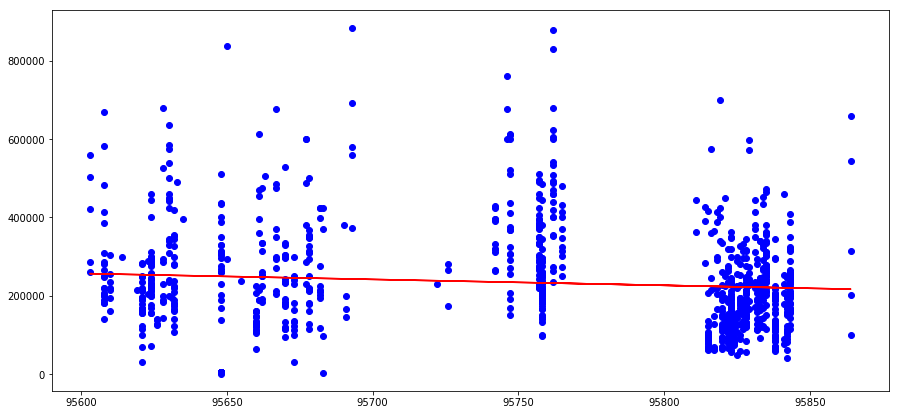

In [84]:
# DO NOT CHANGE, JUST RUN THE CELL
draw_plot(X3, Y, predictedValues3)

**Based on the three residual values which predictor provides the best predictions, X1, X2 or X3? Explain.**

In [ ]:
#**Write your answers here.**
## sq__ft/X1 is the best predictor as the line of best fit or prediction line created on the graph follows the overall general positive
## correlation of the datapoints, whereas the other graphs show little correleation with the predictor lines not being
## as related to the graph.

### 4) Predict price for a new house

For the given information:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**make a prediction for the house details given.**

In [153]:
## Idk what to do here
#X4 = [data['sq__ft'] == 1204, data['beds'] == 3, data['baths'] == 2]
X4 = data['sq__ft']
X5 = data['beds']
X6 = data['baths']
Y = data['price']

beta1 = calculatebeta1(X4, Y)
beta0 = calculatebeta0(X4, Y)

beta12 = calculatebeta1(X5, Y)
beta02 = calculatebeta0(X5, Y)

beta13 = calculatebeta1(X6, Y)
beta03 = calculatebeta0(X6, Y)

In [147]:
ypredicted = (calculatePredictions(X4, beta0, beta1) + calculatePredictions(X5, beta02, beta12) + calculatePredictions(X6, beta03, beta13))//3

In [148]:
print(ypredicted)

0      197851.0
1      215888.0
2      197129.0
3      198140.0
4      197147.0
5      215075.0
6      236190.0
7      216068.0
8      221186.0
9      236948.0
10     232670.0
11     239530.0
12     186422.0
13     213234.0
14     222649.0
15     224671.0
16     197996.0
17     197111.0
18     193374.0
19     240739.0
20     236443.0
21     252313.0
22     250706.0
23     245162.0
24     232525.0
25     235901.0
26     212205.0
27     236461.0
28     253233.0
29     238790.0
         ...   
955    241010.0
956    218469.0
957    239042.0
958    259732.0
959    243646.0
960    242436.0
961    241822.0
962    210851.0
963    250235.0
964    239764.0
965    241859.0
966    216260.0
967    252132.0
968    260274.0
969    257692.0
970    137198.0
971    213595.0
972    212151.0
973    216260.0
974    221105.0
975    242436.0
976    240775.0
977    252313.0
978    259281.0
979    239042.0
980    290920.0
981    242924.0
982    238212.0
983    258740.0
984    240848.0
Length: 985, dtype: floa